# <center> Numerical Simulation of a Two-Stage Rocket

#### Libraries

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

#### Functions

In [2]:
class Calculations:

    @staticmethod
    def one_stage_height(mass_boost, mass_coast, t, T, g, k):
        # mass_boost = mass during boost
        # mass_coast = mass during coast
        # t = burn time
        # T = avg motor thrust in Newtons
        # g = gravitational acceleration

        q = np.sqrt((T - mass_boost * g) / k)

        x = 2 * k * q / mass_boost

        v = q * (1 - np.exp(-x * t)) / (1 + np.exp(-x * t))

        y_1 = -mass_boost / (2 * k) * np.log((T - mass_boost * g - k * v ** 2) / (T - mass_boost * g))

        y_c = mass_coast / (2 * k) * np.log((mass_coast * g + k * v ** 2) / (mass_coast * g))

        q_a = np.sqrt(mass_coast * g / k)

        q_b = np.sqrt(g * k / mass_coast)

        t_a = np.arctan(v / q_a) / q_b  # coasting time (motor delay)

        return t_a, v, y_1 + y_c

    @staticmethod
    def two_stage_height(mr_1, me_1, mp_1, mr_2, me_2, mp_2, t, T, g, k):
        # mr_1 = empty mass (no motor) of first stage
        # me_1 = loaded mass of engine in first stage
        # mp_1 = mass of propellant in first stage engine
        # mr_2 = empty mass (no motor) of just second stage
        # me_2 = loaded mass of engine in second stage
        # mp_2 = mass of propellant in second stage engine
        # t = array of burn times, first entry = first engine burn time etc
        # T = array of avg thrust, first entry = first engine thrust avg etc
        # g = gravitational acceleration
        # k = drag resistance factor

        mass_boost = mr_1 + mr_2 + me_1 + me_2 + mp_2 - mp_1 / 2

        # first stage
        q = np.sqrt((T[0] - mass_boost * g) / k)

        x = 2 * k * q / mass_boost

        v = q * (1 - np.exp(-x * t[0])) / (1 + np.exp(-x * t[0]))

        y_1 = -mass_boost / (2 * k) * np.log((T[0] - mass_boost * g - k * v ** 2) / (T[0] - mass_boost * g))

        # second stage
        v_0 = v  # set new velocity to old velocity
        m = mr_2 + me_2 - mp_2 / 2

        q_new = np.sqrt((T[1] - m * g) / k)

        x_new = 2 * k * q_new / m

        s = (q_new + v_0) / (q_new - v_0)

        v = q_new * ((s - np.exp(-x_new * t[1])) / (s + np.exp(-x_new * t[1])))

        y_2 = -m / (2 * k) * np.log((T[1] - m * g - k * v ** 2) / (T[1] - m * g - k * v_0 ** 2))

        # coasting phase
        m = me_2 + mr_2 - mp_2

        y_c = m / (2 * k) * np.log((m * g + k * v ** 2) / (m * g))

        q_a = np.sqrt(m * g / k)

        q_b = np.sqrt(g * k / m)

        t_a = np.arctan(v / q_a) / q_b  # coasting time (motor delay)


        return t_a, v, v_0, y_1 + y_2 + y_c

    @staticmethod
    def ODEints():
        pass


In [3]:
def stage1(t, z):
    rho = 1.22
    A = 2.552 * 10 ** -3
    C_d = 0.75
    mdot = 0.2225  # kg/s - mass flow rate
    u_e = 2175  # m/s

    h = z[0]  # initial values
    v = z[1]
    m = z[2]

    dhdt = v
    dvdt = - 9.81 - (0.5 * rho * v ** 2) * C_d * A / m + (mdot * u_e) / m
    dmdt = - mdot
    return [dhdt, dvdt, dmdt]


def stage2(t, z):
    rho = 1.22
    A = 2.552 * 10 ** -3
    C_d = 0.75
    mdot = 0.1915  # kg/s - mass flow rate
    u_e = 1947.8  # m/s

    h = z[0]  # initial values
    v = z[1]
    m = z[2]

    dhdt = v
    dvdt = - 9.81 - (0.5 * rho * v ** 2) * C_d * A / m + (mdot * u_e) / m
    dmdt = - mdot
    return [dhdt, dvdt, dmdt]


def coast(t, z):
    rho = 1.22
    A = 2.552 * 10 ** -3
    C_d = 0.75

    h = z[0]  # initial values
    v = z[1]
    m = z[2]

    dhdt = v
    dvdt = - 9.81 - (0.5 * rho * v ** 2) * C_d * A / m
    dmdt = 0
    return [dhdt, dvdt, dmdt]


def accel(m, v, phase):
    rho = 1.22
    A = 2.552 * 10 ** -3
    C_d = 0.75

    if phase == 0:  # lower stage burn
        mdot = 0.2225  # kg/s - mass flow rate
        u_e = 2175
        return - 9.81 - (0.5 * rho * v ** 2) * C_d * A / m + (mdot * u_e) / m

    elif phase == 1:  # coasting
        return - 9.81 - (0.5 * rho * v ** 2) * C_d * A / m

    elif phase == 2:  # upper stage
        mdot = 0.1915  # kg/s - mass flow rate
        u_e = 1947.8
        return - 9.81 - (0.5 * rho * v ** 2) * C_d * A / m + (mdot * u_e) / m

The Max Height is 2271.6049378537646 m
The Max velocity is 354.97549306453095 m/s


/Users/bhanuprakash/.pyenv/versions/3.12.4/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1245: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/Users/bhanuprakash/.pyenv/versions/3.12.4/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1246: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Users/bhanuprakash/.pyenv/versions/3.12.4/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1247: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/Users/bhanuprakash/.pyenv/versions/3.12.4/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:1253: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


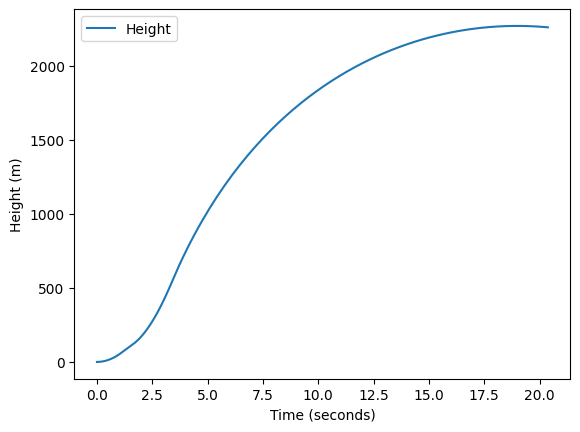

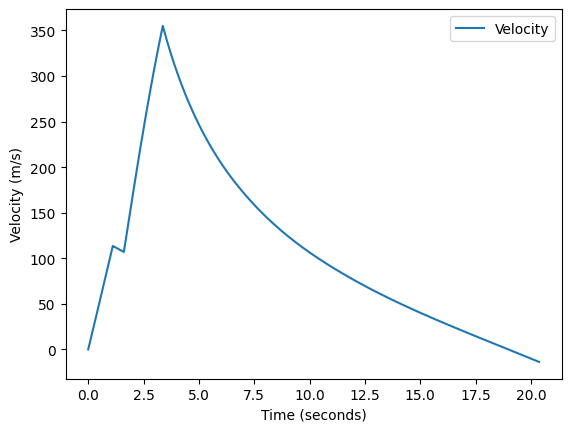

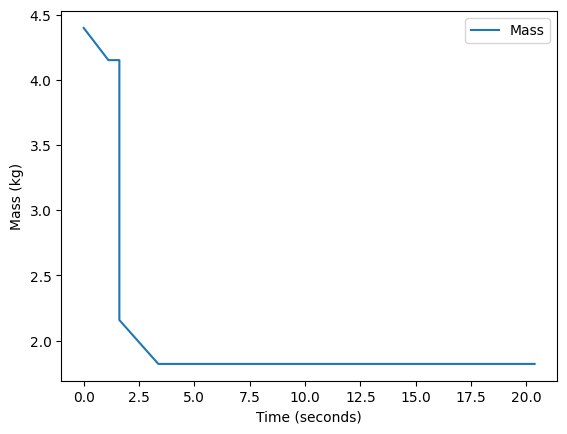

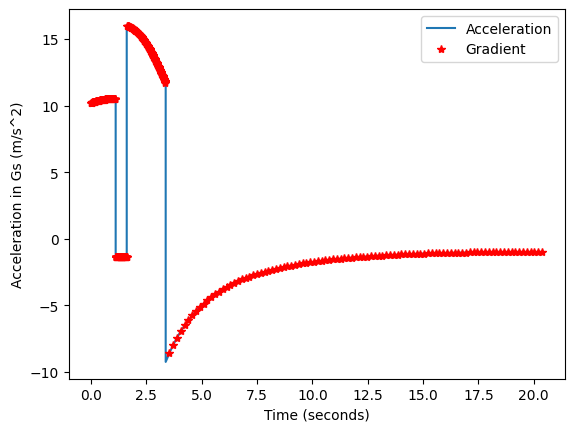

In [4]:
m_init = 4.4  # initial fully loaded mass in kg
num = 100
# 1st burn
z0 = [0, 0, m_init]  # setting initial conditions [height, velocity, mass]
t_end = 0.2472 / 0.2225
t = np.linspace(0, t_end, num)
sol = spi.solve_ivp(stage1, (0, t_end), z0, t_eval=t)

# Coast for 1 second
z1 = [sol.y[0, -1], sol.y[1, -1], sol.y[2, -1]]
ct = t_end + 0.5
t2 = np.linspace(t_end, ct, num)
sol2 = spi.solve_ivp(coast, (t_end, ct), z1, t_eval=t2)

# 2nd Burn
z2 = [sol2.y[0, -1], sol2.y[1, -1], sol2.y[2, -1] - 1.995]  # taking into account bottom stage mass loss
t2_end = 0.337 / 0.1915
t3 = np.linspace(ct, ct + t2_end, num)
sol3 = spi.solve_ivp(stage2, (ct, ct + t2_end), z2, t_eval=t3)

# Final Coast
z3 = [sol3.y[0, -1], sol3.y[1, -1], sol3.y[2, -1]]
cstart = ct + t2_end
t4 = np.linspace(cstart, cstart + 17, num)
sol4 = spi.solve_ivp(coast, (cstart, cstart + 17), z3, t_eval=t4)

time = np.concatenate((sol.t, sol2.t, sol3.t, sol4.t))

height = np.concatenate((sol.y[0, :], sol2.y[0, :], sol3.y[0, :], sol4.y[0, :]))
print(f"The Max Height is {max(height)} m")

velocity = np.concatenate((sol.y[1, :], sol2.y[1, :], sol3.y[1, :], sol4.y[1, :]))
print(f"The Max velocity is {max(velocity)} m/s")

mass = np.concatenate((sol.y[2, :], sol2.y[2, :], sol3.y[2, :], sol4.y[2, :]))

boost_1 = [0] * num
for i in range(num):
    m = sol.y[2, i]
    for j in range(num):
        v = sol.y[1, i]
        boost_1[i] = accel(m, v, 0)
        break

coast_1 = [0] * num
for i in range(num):
    m = sol2.y[2, i]
    for j in range(num):
        v = sol2.y[1, i]
        coast_1[i] = accel(m, v, 1)
        break

boost_2 = [0] * num
for i in range(num):
    m = sol3.y[2, i]
    for j in range(num):
        v = sol3.y[1, i]
        boost_2[i] = accel(m, v, 2)
        break

coast_2 = [0] * num
for i in range(num):
    m = sol4.y[2, i]
    for j in range(num):
        v = sol4.y[1, i]
        coast_2[i] = accel(m, v, 1)
        break

accel = np.concatenate((boost_1, coast_1, boost_2, coast_2))/9.81

grad = np.gradient(velocity, time) /9.81 # should get same results, this is a 2nd order central diff scheme

plt.figure(0)
plt.plot(time, height, label='Height')
plt.xlabel('Time (seconds)')
plt.ylabel('Height (m)')
plt.legend()

plt.figure(1)
plt.plot(time, velocity, label='Velocity')
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (m/s)')
plt.legend()

plt.figure(2)
plt.plot(time, mass, label='Mass')
plt.xlabel('Time (seconds)')
plt.ylabel('Mass (kg)')
plt.legend()
plt.show()

plt.figure(3)
plt.plot(time, accel, label='Acceleration')
plt.plot(time, grad, 'r*', label='Gradient')  # verification
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration in Gs (m/s^2)')
plt.legend()
plt.show()

In [5]:
#drag factor calculation
rho = 1.22  # kg/m^3
A = 2.552*10**-3 # m^2 ---------- UNKNOWN GUESS ATM
Cd = 0.75  # air drag coefficient
g = 9.8  # m/s^2

k = 0.5 * rho * Cd * A  # drag resistance factor


# first stage data

I_1 = 540  # Impulse (Newton-seconds)
T_max_1 = 555.2  # max thrust (Newton)
t_1 = 1.1  # burn time (seconds)
T_avg_1 = t_1 * I_1 * 0.8  # avg thrust (Newtons)
mr_1 = 1.5  # empty mass (no motor) of just first stage (kg) ----- UNKNOWN GUESS ATM
me_1 = 0.495  # loaded mass of motor (kg)
mp_1 = 0.2472  # propellant mass (kg)
mass_boost = mr_1 + me_1 - mp_1 / 2
mass_coast = mr_1 + me_1 - mp_1

# second stage data

I_2 = 658  # Impulse (Newton-seconds)
T_max_2 = 512.3  # max thrust (Newton)
t_2 = 1.9  # burn time (seconds)
T_avg_2 = t_2 * I_2 * 0.8  # avg thrust (Newtons)
mr_2 = 2  # empty mass (no motor) (kg) ------ UNKNOWN GUESS ATM
me_2 = 0.601  # loaded mass  (kg)
mp_2 = 0.337  # propellant mass (kg)


# # just using bottom motor and no staging
# t_a, v, height = Calculations.one_stage_height(mass_boost, mass_coast, t_1, T_avg_1, g, k)
# print("Just One stage motor firing - no separation")
# print(f"The calculated coast time is {t_a} s")
# print(f"The max velocity is {v} m/s")
# print(f"The peak altitude is {height} m")
# print("-")

# two stage with no delay of staging between first and second
t = [t_1, t_2]
T = [T_avg_1, T_avg_2]

t_a, v, v_0, height = Calculations.two_stage_height(mr_1, me_1, mp_1, mr_2, me_2, mp_2, t, T, g, k)
print("Two stage rocket")
print(f"The calculated coast time is {t_a} s")
print(f"The max velocity is {v} m/s")
print(f"The dv after the first stage is {v_0} m/s")
print(f"The peak altitude is {height} m")

Two stage rocket
The calculated coast time is 19.25183059702939 s
The max velocity is 672.5269550729107 m/s
The dv after the first stage is 97.06272470994128 m/s
The peak altitude is 3965.8564142670534 m
